In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from factor_analyzer import FactorAnalyzer

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/tosim/anaconda3/Library/bin/Graphviz/bin'

In [3]:
df = pd.read_csv(r'G:\Il mio Drive\Magistrale_data_science\CSS\CSS\my_project\data.csv',sep= '\t')


In [4]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [5]:
df = df[(df["age"] < 29) & (df["age"] > 20)]
print(df["age"].max())
print(df["age"].min())

28
21


In [6]:
np.mean(df["age"])

23.461056231003038

In [7]:
np.std(df["age"])

2.1239761461898854

In [8]:
df.columns.to_list()
items_Q = []
items_TIPI = []
items_E = []
for i in range(1,43):
    items_Q.append(f"Q{i}A")
    items_E.append(f"Q{i}E")

for i in range(1,11):
    items_TIPI.append(f"TIPI{i}")

In [9]:
items_extracted_DASS = df[items_Q]
items_extracted_TIPI= df[items_TIPI]

In [10]:
# To check if there are any NaN values
print(items_extracted_DASS .isna().sum())  # Shows the count of NaN values in each column

Q1A     0
Q2A     0
Q3A     0
Q4A     0
Q5A     0
Q6A     0
Q7A     0
Q8A     0
Q9A     0
Q10A    0
Q11A    0
Q12A    0
Q13A    0
Q14A    0
Q15A    0
Q16A    0
Q17A    0
Q18A    0
Q19A    0
Q20A    0
Q21A    0
Q22A    0
Q23A    0
Q24A    0
Q25A    0
Q26A    0
Q27A    0
Q28A    0
Q29A    0
Q30A    0
Q31A    0
Q32A    0
Q33A    0
Q34A    0
Q35A    0
Q36A    0
Q37A    0
Q38A    0
Q39A    0
Q40A    0
Q41A    0
Q42A    0
dtype: int64


In [11]:
import semopy
from semopy import Model
import graphviz
import pingouin as pg

In [12]:
# Perform Mardia's test
mardia = pg.multivariate_normality(items_extracted_DASS, alpha=0.05)

# Display results
print(mardia)

HZResults(hz=1.8474200804683787, pval=0.0, normal=False)


In [13]:
# Define the CFA model
# Define the CFA model with updated item naming
# Define the CFA model
# Define the CFA model
model_spec = """
# Latent variables
Depression =~ Q3A + Q5A + Q10A + Q13A + Q16A + Q17A + Q21A + Q24A + Q26A + Q31A + Q34A + Q37A + Q38A + Q42A
Anxiety =~ Q2A + Q4A + Q7A + Q9A + Q15A + Q19A + Q20A + Q23A + Q25A + Q28A + Q30A + Q36A + Q40A + Q41A
Stress =~ Q1A + Q6A + Q8A + Q11A + Q12A + Q14A + Q18A + Q22A + Q27A + Q29A + Q32A + Q33A + Q35A + Q39A
"""

# Fit the CFA model
model = Model(model_spec)
model.fit(items_extracted_DASS)
# Get model summary
# Get the results
stats = semopy.calc_stats(model)
#print(stats.T)
factors = model.predict_factors(items_extracted_DASS)
g = semopy.semplot(model, "pd.png")





In [14]:
Depression_items = ["Q3A","Q5A" ,"Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A" ,"Q37A","Q38A","Q42A"]
Anxiety_items = ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A"]
Stress_items = ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"]


dep_filt = items_extracted_DASS[Depression_items]
anx_filt = items_extracted_DASS[Anxiety_items]
str_filt = items_extracted_DASS[Stress_items]

In [15]:
dep_filt.mean(axis=1)

22       3.571429
36       3.214286
37       2.285714
39       1.285714
46       1.357143
           ...   
39763    2.357143
39764    1.857143
39768    1.428571
39771    3.714286
39774    2.928571
Length: 15792, dtype: float64

In [16]:
print(np.mean(dep_filt.mean(axis=1)))

print(np.mean(anx_filt.mean(axis=1)))

print(np.mean(str_filt.mean(axis=1)))


2.467185012302793
2.1060889781444496
2.4779228180633956


In [17]:
np.std(dep_filt.mean(axis=1))

0.8646084867803305

In [18]:
print(np.std(dep_filt.mean(axis=1)))

print(np.std(anx_filt.mean(axis=1)))

print(np.std(str_filt.mean(axis=1)))

0.8646084867803305
0.6939165261454896
0.7393197694641749


In [19]:
alpha = pg.cronbach_alpha(data=dep_filt)
print(f"Cronbach's alpha: {alpha[0]}")
alpha = pg.cronbach_alpha(data=anx_filt)
print(f"Cronbach's alpha: {alpha[0]}")
alpha = pg.cronbach_alpha(data=str_filt)
print(f"Cronbach's alpha: {alpha[0]}")

Cronbach's alpha: 0.9543122471707375
Cronbach's alpha: 0.9075903764922626
Cronbach's alpha: 0.9270167401486021


In [20]:
def reverse_item(x):
    return 8-x

In [21]:
reverse_columns = ["TIPI6","TIPI2","TIPI8","TIPI4","TIPI10"]
items_extracted_TIPI[reverse_columns] = items_extracted_TIPI[reverse_columns].applymap(reverse_item)

C:\Users\tosim\AppData\Local\Temp\ipykernel_9792\3485638090.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  items_extracted_TIPI[reverse_columns] = items_extracted_TIPI[reverse_columns].applymap(reverse_item)
C:\Users\tosim\AppData\Local\Temp\ipykernel_9792\3485638090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_extracted_TIPI[reverse_columns] = items_extracted_TIPI[reverse_columns].applymap(reverse_item)


In [22]:
neuroticism_items = ["TIPI4","TIPI9"]
neuroticism = items_extracted_TIPI[neuroticism_items]
neuroticism_score = neuroticism.sum(axis=1)

In [23]:
extraversion_items = ["TIPI1","TIPI6"]
extraversion = items_extracted_TIPI[extraversion_items]
extraversion_score = extraversion.sum(axis=1)


In [24]:
print(np.mean(neuroticism.mean(axis=1)))
print(np.mean(extraversion.mean(axis=1)))


3.307719098277609
3.5174455420466058


In [25]:
print(np.std(neuroticism.mean(axis=1)))
print(np.std(extraversion.mean(axis=1)))


1.4838583756363335
1.5079144412332848


In [26]:
alpha = pg.cronbach_alpha(data=neuroticism)
print(f"Cronbach's alpha: {alpha[0]}")
alpha = pg.cronbach_alpha(data=extraversion)
print(f"Cronbach's alpha: {alpha[0]}")


Cronbach's alpha: 0.5530748848628559
Cronbach's alpha: 0.4671627739321602


In [27]:
neuroticism.sum(axis=1)

22        4
36        4
37        6
39       11
46        7
         ..
39763     6
39764    11
39768     6
39771     5
39774     4
Length: 15792, dtype: int64

In [28]:
import scipy.stats

In [29]:
#Emotional Stability: 4R, 9
dep_filt.sum(axis=1)
dep_score = dep_filt.sum(axis=1)

In [30]:
#Emotional Stability: 4R, 9
anx_filt.sum(axis=1)
anx_score = anx_filt.sum(axis=1)

In [31]:
#Emotional Stability: 4R, 9
str_filt.sum(axis=1)
str_score = str_filt.sum(axis=1)

In [32]:
import scipy.stats
scipy.stats.pearsonr(neuroticism_score ,dep_score) 


PearsonRResult(statistic=-0.5006040962305633, pvalue=0.0)

In [33]:
import scipy.stats
scipy.stats.pearsonr(extraversion_score ,dep_score) 

PearsonRResult(statistic=-0.27702478539102837, pvalue=3.8272636669904676e-276)

In [34]:
scipy.stats.pearsonr(neuroticism_score ,anx_score) 


PearsonRResult(statistic=-0.5091688948453899, pvalue=0.0)

In [35]:
scipy.stats.pearsonr(extraversion_score ,anx_score) 

PearsonRResult(statistic=-0.1650593430777038, pvalue=7.464348322227243e-97)

In [36]:
scipy.stats.pearsonr(neuroticism_score ,str_score) 

PearsonRResult(statistic=-0.6279509324732481, pvalue=0.0)

In [37]:
scipy.stats.pearsonr(extraversion_score ,str_score) 

PearsonRResult(statistic=-0.1729129494120524, pvalue=3.049724234998123e-106)

In [38]:
dep_filt.mean(axis=1)

22       3.571429
36       3.214286
37       2.285714
39       1.285714
46       1.357143
           ...   
39763    2.357143
39764    1.857143
39768    1.428571
39771    3.714286
39774    2.928571
Length: 15792, dtype: float64

In [39]:
# Assuming dep_filt, anx_filt, and str_filt are already defined as 2D arrays or DataFrames, and df contains 'education', 'gender', and 'age' columns

# Initialize an empty list to store the results
results = []

# Perform the statistical tests and store the results
results.append(["dep_filt vs education", *scipy.stats.pearsonr(dep_filt.mean(axis=1), df["education"])])
results.append(["dep_filt vs gender", *scipy.stats.pointbiserialr(dep_filt.mean(axis=1), df["gender"])])
results.append(["dep_filt vs age", *scipy.stats.pearsonr(dep_filt.mean(axis=1), df["age"])])

results.append(["anx_filt vs education", *scipy.stats.pearsonr(anx_filt.mean(axis=1), df["education"])])
results.append(["anx_filt vs gender", *scipy.stats.pointbiserialr(anx_filt.mean(axis=1), df["gender"])])
results.append(["anx_filt vs age", *scipy.stats.pearsonr(anx_filt.mean(axis=1), df["age"])])

results.append(["str_filt vs education", *scipy.stats.pearsonr(str_filt.mean(axis=1), df["education"])])
results.append(["str_filt vs gender", *scipy.stats.pointbiserialr(str_filt.mean(axis=1), df["gender"])])
results.append(["str_filt vs age", *scipy.stats.pearsonr(str_filt.mean(axis=1), df["age"])])

results.append(["tot vs education", *scipy.stats.pearsonr(items_extracted_DASS .mean(axis=1), df["education"])])
results.append(["tot vs gender", *scipy.stats.pointbiserialr(items_extracted_DASS .mean(axis=1), df["gender"])])
results.append(["tot vs age", *scipy.stats.pearsonr(items_extracted_DASS .mean(axis=1), df["age"])])


# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Test", "Correlation Coefficient", "p-value"])

# Print the DataFrame
print(results_df)


                     Test  Correlation Coefficient       p-value
0   dep_filt vs education                -0.077819  1.203770e-22
1      dep_filt vs gender                 0.031344  8.164536e-05
2         dep_filt vs age                -0.018374  2.094252e-02
3   anx_filt vs education                -0.047132  3.108685e-09
4      anx_filt vs gender                 0.107953  3.750441e-42
5         anx_filt vs age                -0.073322  2.816206e-20
6   str_filt vs education                -0.050480  2.192763e-10
7      str_filt vs gender                 0.114645  2.382492e-47
8         str_filt vs age                -0.032432  4.574405e-05
9        tot vs education                -0.065708  1.390515e-16
10          tot vs gender                 0.089377  2.231414e-29
11             tot vs age                -0.043424  4.785588e-08


In [40]:
items_extracted_DASS

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
22,3,2,3,4,3,3,4,4,2,4,...,3,4,3,4,4,4,4,3,3,3
36,4,1,1,3,2,4,3,2,4,4,...,2,3,1,3,4,4,3,2,3,4
37,1,1,2,2,2,1,1,4,4,2,...,4,2,1,1,3,2,2,3,1,3
39,2,1,1,1,2,2,1,1,1,1,...,1,1,2,1,1,1,2,1,1,2
46,1,2,1,1,1,1,1,2,2,1,...,2,2,2,2,1,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39763,2,2,2,2,3,3,2,2,3,3,...,2,3,2,2,2,2,2,3,1,2
39764,2,2,1,1,2,1,1,2,1,2,...,1,1,1,1,2,2,2,1,1,3
39768,2,1,1,1,2,2,1,2,1,1,...,2,1,2,1,1,1,2,1,1,2
39771,3,4,3,4,3,4,4,4,3,4,...,3,4,3,3,3,4,3,3,3,4


              Depression   Anxiety    Stress  Neuroticism  Extraversion
Depression      1.000000  0.671424  0.751155    -0.500604     -0.277025
Anxiety         0.671424  1.000000  0.804223    -0.509169     -0.165059
Stress          0.751155  0.804223  1.000000    -0.627951     -0.172913
Neuroticism    -0.500604 -0.509169 -0.627951     1.000000      0.172993
Extraversion   -0.277025 -0.165059 -0.172913     0.172993      1.000000


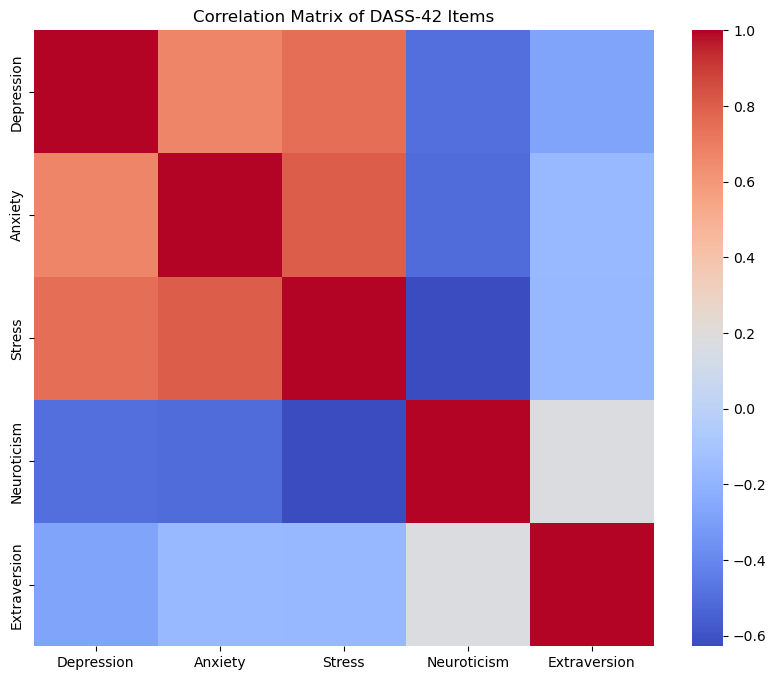

In [41]:
import matplotlib.pyplot as plt
# Assuming `dep_filt`, `anx_filt`, and `str_filt` are DataFrames with filtered items
combined = pd.concat([dep_filt.mean(axis=1), anx_filt.mean(axis=1), str_filt.mean(axis=1),neuroticism.mean(axis=1),extraversion.mean(axis=1)],axis=1)
combined.columns = ["Depression", "Anxiety", "Stress", "Neuroticism", "Extraversion"]

# Compute pairwise correlations
correlation_matrix = combined.corr()

# Display correlation matrix
print(correlation_matrix)

# Optionally, visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of DASS-42 Items")
plt.show()

In [42]:
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,anx_filt.mean(axis=1)))
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,str_filt.mean(axis=1)))
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,neuroticism.mean(axis=1)))
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,extraversion.mean(axis=1)))
print(scipy.stats.pearsonr(anx_filt.mean(axis=1) ,str_filt.mean(axis=1)))
print(scipy.stats.pearsonr(anx_filt.mean(axis=1) ,neuroticism.mean(axis=1)))
print(scipy.stats.pearsonr(anx_filt.mean(axis=1) ,extraversion.mean(axis=1)))
print(scipy.stats.pearsonr(str_filt.mean(axis=1) ,neuroticism.mean(axis=1)))
print(scipy.stats.pearsonr(str_filt.mean(axis=1) ,extraversion.mean(axis=1)))
print(scipy.stats.pearsonr(neuroticism.mean(axis=1) ,extraversion.mean(axis=1)))

PearsonRResult(statistic=0.6714240226643178, pvalue=0.0)
PearsonRResult(statistic=0.7511553903338973, pvalue=0.0)
PearsonRResult(statistic=-0.5006040962305633, pvalue=0.0)
PearsonRResult(statistic=-0.27702478539102837, pvalue=3.8272636669904676e-276)
PearsonRResult(statistic=0.8042233338413877, pvalue=0.0)
PearsonRResult(statistic=-0.5091688948453899, pvalue=0.0)
PearsonRResult(statistic=-0.16505934307770379, pvalue=7.464348322227243e-97)
PearsonRResult(statistic=-0.6279509324732481, pvalue=0.0)
PearsonRResult(statistic=-0.1729129494120524, pvalue=3.049724234998123e-106)
PearsonRResult(statistic=0.17299297023812307, pvalue=2.433476659639169e-106)


In [43]:
for i in list(str_filt.columns):  # Loop through each column name
    # Drop the current column and calculate the mean of the remaining columns
    correlations = str_filt[i].corr(str_filt.drop(columns=[i]).mean(axis=1))
    print(f"Correlation of {i} with row-wise mean (excluding {i}): {correlations}")

Correlation of Q1A with row-wise mean (excluding Q1A): 0.7186349681199112
Correlation of Q6A with row-wise mean (excluding Q6A): 0.6701148171734171
Correlation of Q8A with row-wise mean (excluding Q8A): 0.6818721819907015
Correlation of Q11A with row-wise mean (excluding Q11A): 0.7269487245717531
Correlation of Q12A with row-wise mean (excluding Q12A): 0.6436977728053482
Correlation of Q14A with row-wise mean (excluding Q14A): 0.5307617627725894
Correlation of Q18A with row-wise mean (excluding Q18A): 0.5758211486688801
Correlation of Q22A with row-wise mean (excluding Q22A): 0.6826345310017362
Correlation of Q27A with row-wise mean (excluding Q27A): 0.7038048847337052
Correlation of Q29A with row-wise mean (excluding Q29A): 0.7092365365300969
Correlation of Q32A with row-wise mean (excluding Q32A): 0.65008400873953
Correlation of Q33A with row-wise mean (excluding Q33A): 0.6593482307949371
Correlation of Q35A with row-wise mean (excluding Q35A): 0.6406489135354198
Correlation of Q39A 

In [44]:
for i in list(anx_filt.columns):  # Loop through each column name
    # Drop the current column and calculate the mean of the remaining columns
    correlations = anx_filt[i].corr(anx_filt.drop(columns=[i]).mean(axis=1))
    print(f"Correlation of {i} with row-wise mean (excluding {i}): {correlations}")

Correlation of Q2A with row-wise mean (excluding Q2A): 0.4711863682867113
Correlation of Q4A with row-wise mean (excluding Q4A): 0.6523450774231225
Correlation of Q7A with row-wise mean (excluding Q7A): 0.6678400542101032
Correlation of Q9A with row-wise mean (excluding Q9A): 0.6213111608605515
Correlation of Q15A with row-wise mean (excluding Q15A): 0.5850406223644232
Correlation of Q19A with row-wise mean (excluding Q19A): 0.510863030789404
Correlation of Q20A with row-wise mean (excluding Q20A): 0.6704784993361577
Correlation of Q23A with row-wise mean (excluding Q23A): 0.5461286269969531
Correlation of Q25A with row-wise mean (excluding Q25A): 0.6218955755440668
Correlation of Q28A with row-wise mean (excluding Q28A): 0.6972088825262528
Correlation of Q30A with row-wise mean (excluding Q30A): 0.5873870401924592
Correlation of Q36A with row-wise mean (excluding Q36A): 0.6674484916416362
Correlation of Q40A with row-wise mean (excluding Q40A): 0.632670324014012
Correlation of Q41A wi

In [45]:
for i in list(dep_filt.columns):  # Loop through each column name
    # Drop the current column and calculate the mean of the remaining columns
    correlations = dep_filt[i].corr(dep_filt.drop(columns=[i]).mean(axis=1))
    print(f"Correlation of {i} with row-wise mean (excluding {i}): {correlations}")


Correlation of Q3A with row-wise mean (excluding Q3A): 0.7450601691237351
Correlation of Q5A with row-wise mean (excluding Q5A): 0.7337871989674265
Correlation of Q10A with row-wise mean (excluding Q10A): 0.788682928143429
Correlation of Q13A with row-wise mean (excluding Q13A): 0.7757784992093326


Correlation of Q16A with row-wise mean (excluding Q16A): 0.7637372058049962
Correlation of Q17A with row-wise mean (excluding Q17A): 0.7708329127078399
Correlation of Q21A with row-wise mean (excluding Q21A): 0.8069745089100648
Correlation of Q24A with row-wise mean (excluding Q24A): 0.7353791976838111
Correlation of Q26A with row-wise mean (excluding Q26A): 0.741803869696549
Correlation of Q31A with row-wise mean (excluding Q31A): 0.7271434774568696
Correlation of Q34A with row-wise mean (excluding Q34A): 0.7886034365856954
Correlation of Q37A with row-wise mean (excluding Q37A): 0.7596804574909823
Correlation of Q38A with row-wise mean (excluding Q38A): 0.8004984705014453
Correlation of Q42A with row-wise mean (excluding Q42A): 0.623234722328102


In [46]:
dep_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Depression_items).mean(axis=1))


0.7501759502942869

In [47]:
anx_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Anxiety_items).mean(axis=1))


0.7826242059649371

In [48]:
str_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Stress_items).mean(axis=1))


0.846526399703669

In [49]:
print(dep_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Depression_items).mean(axis=1)))
print(anx_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Anxiety_items).mean(axis=1)))
print(str_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Stress_items).mean(axis=1)))


0.7501759502942869
0.7826242059649371
0.846526399703669


In [50]:
from scipy.stats import pearsonr

# For Depression
dep_corr, dep_p = pearsonr(
    dep_filt.mean(axis=1), 
    items_extracted_DASS.drop(columns=Depression_items).mean(axis=1)
)
print(f"Depression: Correlation = {dep_corr}, p-value = {dep_p}")

# For Anxiety
anx_corr, anx_p = pearsonr(
    anx_filt.mean(axis=1), 
    items_extracted_DASS.drop(columns=Anxiety_items).mean(axis=1)
)
print(f"Anxiety: Correlation = {anx_corr}, p-value = {anx_p}")

# For Stress
str_corr, str_p = pearsonr(
    str_filt.mean(axis=1), 
    items_extracted_DASS.drop(columns=Stress_items).mean(axis=1)
)
print(f"Stress: Correlation = {str_corr}, p-value = {str_p}")


Depression: Correlation = 0.7501759502942864, p-value = 0.0
Anxiety: Correlation = 0.7826242059649373, p-value = 0.0
Stress: Correlation = 0.8465263997036694, p-value = 0.0


In [51]:
import numpy as np
import pandas as pd

# Extract results
results = model.inspect()

# Define the latent constructs and their associated indicators
construct_names = ["Depression", "Anxiety", "Stress"]
construct_indicators = {
    "Depression": ["Q3A", "Q5A", "Q10A", "Q13A", "Q16A", "Q17A", "Q21A", "Q24A", "Q26A", "Q31A", "Q34A", "Q37A", "Q38A", "Q42A"],
    "Anxiety": ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A"],
    "Stress": ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"]
}

# Extract the loadings from the 'Estimate' column based on indicators
loadings = {name: results[results['rval'] == name][['lval', 'Estimate']] for name in construct_names}

# Calculate AVE and CR for each construct
ave_cr = {}
for name, indicators in construct_indicators.items():
    # Get the loadings for the construct
    construct_loadings = loadings[name]
    
    # Only keep the loadings that correspond to the indicators for the given latent variable
    construct_loadings = construct_loadings[construct_loadings['lval'].isin(indicators)]
    
    # Calculate AVE
    ave = np.sum(construct_loadings['Estimate']**2) / (np.sum(construct_loadings['Estimate']**2) + len(construct_loadings) * 1)  # Assuming error variance = 1
    
    # Calculate CR
    cr = (np.sum(construct_loadings['Estimate'])**2) / ((np.sum(construct_loadings['Estimate'])**2) + len(construct_loadings) * 1)  # Assuming error variance = 1
    
    ave_cr[name] = {"AVE": ave, "CR": cr}

# Display AVE and CR
for construct, values in ave_cr.items():
    print(f"{construct} - AVE: {values['AVE']:.3f}, CR: {values['CR']:.3f}")



Depression - AVE: 0.543, CR: 0.943
Anxiety - AVE: 0.608, CR: 0.955
Stress - AVE: 0.470, CR: 0.925


In [54]:
construct_loadings

,lval,Estimate
28,Q1A,1.000000
29,Q6A,0.938537
30,Q8A,0.985892
31,Q11A,1.030807
32,Q12A,0.956147
33,Q14A,0.768986
34,Q18A,0.834241
35,Q22A,0.950024
36,Q27A,0.991212
37,Q29A,1.019979


In [55]:
df = pd.read_csv(r'G:\Il mio Drive\Magistrale_data_science\CSS\CSS\my_project\data.csv',sep= '\t')

df = df[(df["age"] > 60) & (df["age"] <90)]

In [56]:
print(df["age"].max())
print(df["age"].min())

89
61


In [57]:
np.mean(df["age"])

66.46245059288538

In [58]:
np.std(df["age"])

5.33498160982802

In [59]:
items_extracted_DASS = df[items_Q]

In [60]:
items_extracted_DASS

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
56,2,1,1,1,2,2,1,1,1,1,...,2,1,1,1,1,1,2,2,1,2
144,1,2,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
152,2,1,2,2,3,1,2,1,2,1,...,2,2,3,2,2,1,2,2,1,3
324,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
369,4,2,2,2,4,4,2,3,3,2,...,4,2,3,2,3,1,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38967,2,1,1,1,2,2,1,2,2,2,...,2,1,2,1,2,1,2,1,1,2
39291,3,1,2,3,2,2,1,2,3,1,...,2,2,2,1,1,1,2,1,1,2
39571,3,2,2,2,2,3,1,2,3,2,...,2,2,2,2,2,3,2,3,1,3
39725,2,3,3,1,3,2,1,4,1,3,...,3,3,3,2,3,2,3,3,1,4


In [61]:
items_extracted_TIPI = df[items_TIPI]

In [62]:
items_extracted_DASS["score"] = items_extracted_DASS.sum(axis=1)

C:\Users\tosim\AppData\Local\Temp\ipykernel_9792\1304992868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_extracted_DASS["score"] = items_extracted_DASS.sum(axis=1)


In [63]:
items_extracted_DASS["score"] 

56        56
144       47
152       69
324       47
369      116
        ... 
38967     66
39291     73
39571     91
39725     96
39742    157
Name: score, Length: 253, dtype: int64

In [64]:
def parallel_analysis(n_simulation, n_samples, n_variables):
    # Initialize an array to store factor loadings
    all_loadings = []
    n_factors =10  # Replace with the number determined from eigenvalues/scree test

    for _ in range(n_simulation):
        # Generate random data for each simulation
        random_data = np.random.rand(n_samples, n_variables)
        
        # Perform factor analysis on random data
        fa = FactorAnalyzer(n_factors=n_factors, rotation="promax", method='principal')
        fa.fit(random_data)
        
        # Store loadings
        all_loadings.append(fa.loadings_)

    # Compute the mean of the factor loadings across simulations
    mean_loadings = np.mean(all_loadings, axis=0)
    
    # Create a DataFrame for the mean loadings
    loadings = pd.DataFrame(
        mean_loadings, 
        index=[f"Variable {i+1}" for i in range(n_variables)], 
        columns=[f"Factor {i+1}" for i in range(n_factors)]
    )
    
    return mean_loadings

# Example usage
n_simulation = 10
n_samples = 261
n_variables = 42

loadings = parallel_analysis(n_simulation, n_samples, n_variables)
print(loadings)


[[ 0.0212949   0.15088089  0.1517038  -0.02617489  0.0905771  -0.07487495
   0.07701948  0.01650955  0.00048206 -0.01466974]
 [ 0.07443433 -0.03047764  0.05054411  0.09116593  0.00734778  0.16604897
  -0.03129301  0.08342064  0.02826731  0.06292366]
 [ 0.01930616 -0.02333693  0.00847246  0.15149843 -0.00520883 -0.00485947
   0.09197186  0.08327843  0.07026817  0.06683397]
 [ 0.068863   -0.04357089 -0.00499383  0.04546899 -0.04074745 -0.0315356
   0.0262837  -0.09316197  0.04573778 -0.0229674 ]
 [ 0.06675144  0.14321619 -0.03978707  0.03285931 -0.0475477  -0.01179702
   0.0426613   0.00763028  0.10546773  0.08327134]
 [ 0.02219138  0.22362122  0.05689607  0.05353058 -0.00882624  0.05178812
   0.09227049 -0.07220982 -0.01076941 -0.00339461]
 [ 0.04832416  0.00147441 -0.12212966  0.08436403 -0.02651366 -0.02074353
   0.05343957  0.00752992  0.03103431 -0.10504947]
 [-0.00736222 -0.00029359  0.05691384 -0.10080734  0.01030976  0.22374352
   0.02821845  0.01502012  0.04090428  0.14173174]
 

In [65]:
n_factors = 10  # Replace with the number determined from eigenvalues/scree test
fa = FactorAnalyzer(n_factors=n_factors, rotation="promax", method='ml')
fa.fit(items_extracted_DASS)

c:\Users\tosim\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:443: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) - n_factors + corr_mtx.shape[0])
c:\Users\tosim\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:574: UserWarning: Failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(f"Failed to converge: {res.message}")


FactorAnalyzer(method='ml', n_factors=10, rotation_kwargs={})

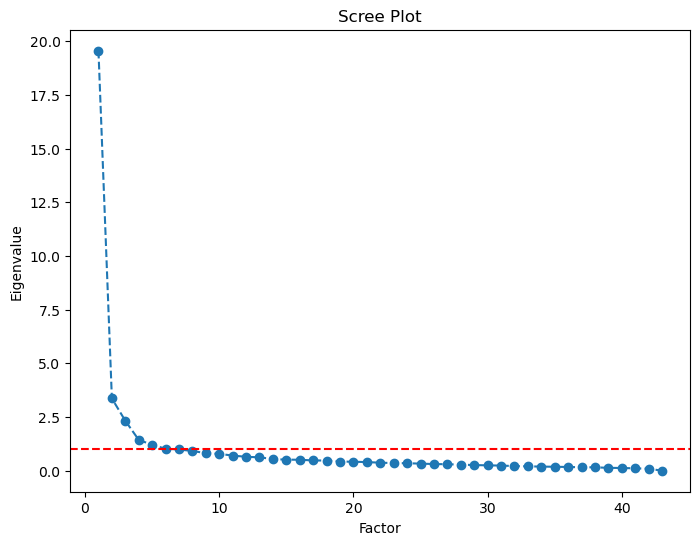

In [66]:
import matplotlib.pyplot as plt
# Extract the eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')  # Optional: mark the eigenvalue = 1 threshold
plt.show()

In [67]:
loadings = pd.DataFrame(fa.loadings_, index=items_extracted_DASS.columns, columns=[f"Factor {i+1}" for i in range(10)])


In [68]:
loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10
Q1A,0.063420,0.940077,0.151039,-0.177061,0.042646,-0.061755,-0.022044,0.038729,-0.145012,-0.085279
Q2A,0.144639,-0.170639,-0.063302,0.152900,-0.044081,0.041032,0.010345,0.291136,0.084568,0.814570
Q3A,0.774919,-0.020158,-0.101016,0.193897,-0.028411,0.054692,0.128373,0.030484,-0.003223,-0.085950
Q4A,0.026340,-0.209618,0.201813,0.154791,0.689708,-0.092665,0.105328,0.059762,0.049687,-0.035456
Q5A,0.417004,0.092848,-0.015323,-0.068468,0.084818,-0.001261,0.617908,-0.018639,-0.055282,0.068259
Q6A,-0.105364,0.833268,0.056233,-0.041939,0.003186,0.103235,0.021851,-0.045148,0.029442,-0.020094
Q7A,0.065539,-0.054438,0.122925,-0.145835,0.240599,0.760905,0.045757,0.022387,-0.060268,-0.118926
Q8A,0.117092,-0.021222,-0.040480,0.866946,-0.016370,-0.015292,-0.045597,-0.004979,0.070426,0.085193
Q9A,-0.045161,0.035864,0.612262,0.278425,-0.029957,-0.042736,0.027141,0.075642,-0.073851,-0.068844
Q10A,0.876531,0.002452,0.006320,0.033556,0.007711,-0.032027,-0.041705,-0.077258,0.043530,0.089458


In [69]:
variance_explained = fa.get_factor_variance()
variance_explained 

(array([8.75120286, 5.06169351, 3.52484324, 2.91273955, 1.80206038,
        1.7449716 , 1.5292994 , 1.52188833, 1.45100375, 1.13519391]),
 array([0.20351635, 0.1177138 , 0.0819731 , 0.06773813, 0.04190838,
        0.04058073, 0.0355651 , 0.03539275, 0.03374427, 0.02639986]),
 array([0.20351635, 0.32123015, 0.40320325, 0.47094138, 0.51284976,
        0.55343049, 0.58899559, 0.62438835, 0.65813262, 0.68453248]))

In [70]:
# Extract total variance, variance per factor, and cumulative variance
variance_per_factor = variance_explained[1]
cumulative_variance = variance_explained[2]

In [71]:
variance_per_factor

array([0.20351635, 0.1177138 , 0.0819731 , 0.06773813, 0.04190838,
       0.04058073, 0.0355651 , 0.03539275, 0.03374427, 0.02639986])

In [72]:
cumulative_variance

array([0.20351635, 0.32123015, 0.40320325, 0.47094138, 0.51284976,
       0.55343049, 0.58899559, 0.62438835, 0.65813262, 0.68453248])

In [73]:
results = pd.DataFrame({
    "Real Eigenvalues": variance_per_factor,
    "Mean Random Eigenvalues": loadings.mean(axis=0)
})


In [74]:
results

,Real Eigenvalues,Mean Random Eigenvalues
Factor 1,0.203516,0.262677
Factor 2,0.117714,0.157943
Factor 3,0.081973,0.123385
Factor 4,0.067738,0.094915
Factor 5,0.041908,0.059480
Factor 6,0.040581,0.044156
Factor 7,0.035565,0.061868
Factor 8,0.035393,0.043130
Factor 9,0.033744,0.051364
Factor 10,0.026400,0.034676


In [75]:
loadings.iloc[:,0:3]

,Factor 1,Factor 2,Factor 3
Q1A,0.063420,0.940077,0.151039
Q2A,0.144639,-0.170639,-0.063302
Q3A,0.774919,-0.020158,-0.101016
Q4A,0.026340,-0.209618,0.201813
Q5A,0.417004,0.092848,-0.015323
Q6A,-0.105364,0.833268,0.056233
Q7A,0.065539,-0.054438,0.122925
Q8A,0.117092,-0.021222,-0.040480
Q9A,-0.045161,0.035864,0.612262
Q10A,0.876531,0.002452,0.006320


In [76]:
Depression_items = ["Q3A","Q5A" ,"Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A" ,"Q37A","Q38A","Q42A"]
Anxiety_items = ["Q9A", "Q20A", "Q28A", "Q30A", "Q33A", "Q36A", "Q40A", "Q41A"]
Stress_items = ["Q1A", "Q6A", "Q11A","Q14A", "Q18A", "Q27A","Q32A", "Q35A", "Q39A"]


dep_filt = items_extracted_DASS[Depression_items]
anx_filt = items_extracted_DASS[Anxiety_items]
str_filt = items_extracted_DASS[Stress_items]

In [77]:
cross_loadings = ["Q2A", "Q4A", "Q7A", "Q8A", "Q12A", "Q15A", "Q19A", "Q22A", "Q23A", "Q25A", "Q29A", "Q32A", "Q33A", "Q34A"]

In [78]:
items_extracted_DASS.drop(columns=cross_loadings)

,Q1A,Q3A,Q5A,Q6A,Q9A,Q10A,Q11A,Q13A,Q14A,Q16A,...,Q31A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,score
56,2,1,2,2,1,1,2,1,2,1,...,1,1,1,1,1,2,2,1,2,56
144,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,47
152,2,2,3,1,2,1,1,2,1,1,...,1,3,2,2,1,2,2,1,3,69
324,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,47
369,4,2,4,4,3,2,4,2,3,2,...,3,3,2,3,1,4,1,2,4,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38967,2,1,2,2,2,2,2,2,1,2,...,2,2,1,2,1,2,1,1,2,66
39291,3,2,2,2,3,1,2,2,2,2,...,1,2,1,1,1,2,1,1,2,73
39571,3,2,2,3,3,2,3,2,2,2,...,2,2,2,2,3,2,3,1,3,91
39725,2,3,3,2,1,3,3,3,4,2,...,1,3,2,3,2,3,3,1,4,96


In [79]:
alpha = pg.cronbach_alpha(data=dep_filt)
print(f"Cronbach's alpha: {alpha[0]}")
alpha = pg.cronbach_alpha(data=anx_filt)
print(f"Cronbach's alpha: {alpha[0]}")
alpha = pg.cronbach_alpha(data=str_filt)
print(f"Cronbach's alpha: {alpha[0]}")

Cronbach's alpha: 0.9656457652613872
Cronbach's alpha: 0.8785330989561306
Cronbach's alpha: 0.9272638038979875


In [80]:
for i in list(str_filt.columns):  # Loop through each column name
    # Drop the current column and calculate the mean of the remaining columns
    correlations = str_filt[i].corr(str_filt.drop(columns=[i]).mean(axis=1))
    print(f"Correlation of {i} with row-wise mean (excluding {i}): {correlations}")

Correlation of Q1A with row-wise mean (excluding Q1A): 0.7727796035090592
Correlation of Q6A with row-wise mean (excluding Q6A): 0.7268358425014628
Correlation of Q11A with row-wise mean (excluding Q11A): 0.7645754759839147
Correlation of Q14A with row-wise mean (excluding Q14A): 0.6881266104338094
Correlation of Q18A with row-wise mean (excluding Q18A): 0.7765212206219462
Correlation of Q27A with row-wise mean (excluding Q27A): 0.8232005435655788
Correlation of Q32A with row-wise mean (excluding Q32A): 0.6305430279859829
Correlation of Q35A with row-wise mean (excluding Q35A): 0.6682992626564429
Correlation of Q39A with row-wise mean (excluding Q39A): 0.7588332735333441


In [81]:
for i in list(anx_filt.columns):  # Loop through each column name
    # Drop the current column and calculate the mean of the remaining columns
    correlations = anx_filt[i].corr(anx_filt.drop(columns=[i]).mean(axis=1))
    print(f"Correlation of {i} with row-wise mean (excluding {i}): {correlations}")

Correlation of Q9A with row-wise mean (excluding Q9A): 0.6700869503847859
Correlation of Q20A with row-wise mean (excluding Q20A): 0.7174684404128433
Correlation of Q28A with row-wise mean (excluding Q28A): 0.7802673503277632
Correlation of Q30A with row-wise mean (excluding Q30A): 0.5904330691819397
Correlation of Q33A with row-wise mean (excluding Q33A): 0.6593641873597614
Correlation of Q36A with row-wise mean (excluding Q36A): 0.6460392691803271
Correlation of Q40A with row-wise mean (excluding Q40A): 0.6431812639794647
Correlation of Q41A with row-wise mean (excluding Q41A): 0.4300073988440766


In [82]:
for i in list(dep_filt.columns):  # Loop through each column name
    # Drop the current column and calculate the mean of the remaining columns
    correlations = dep_filt[i].corr(dep_filt.drop(columns=[i]).mean(axis=1))
    print(f"Correlation of {i} with row-wise mean (excluding {i}): {correlations}")


Correlation of Q3A with row-wise mean (excluding Q3A): 0.8422337696993508
Correlation of Q5A with row-wise mean (excluding Q5A): 0.7228929092535198
Correlation of Q10A with row-wise mean (excluding Q10A): 0.8343960735103274
Correlation of Q13A with row-wise mean (excluding Q13A): 0.8349409661037612
Correlation of Q16A with row-wise mean (excluding Q16A): 0.8541791177571983
Correlation of Q17A with row-wise mean (excluding Q17A): 0.7835459272785286
Correlation of Q21A with row-wise mean (excluding Q21A): 0.8019303148238558
Correlation of Q24A with row-wise mean (excluding Q24A): 0.7908020341317268
Correlation of Q26A with row-wise mean (excluding Q26A): 0.7923797639916368
Correlation of Q31A with row-wise mean (excluding Q31A): 0.8225973013211062
Correlation of Q34A with row-wise mean (excluding Q34A): 0.7997072888170952
Correlation of Q37A with row-wise mean (excluding Q37A): 0.8137241113739092
Correlation of Q38A with row-wise mean (excluding Q38A): 0.794496125208643
Correlation of Q4

In [83]:
dep_filt.mean(axis=1).corr(items_extracted_DASS.mean(axis=1))


0.9011433452808628

In [84]:
anx_filt.mean(axis=1).corr(items_extracted_DASS.mean(axis=1))


0.8493659660058446

In [85]:
str_filt.mean(axis=1).corr(items_extracted_DASS.mean(axis=1))

0.8218387878611164

In [86]:
print(np.mean(dep_filt.mean(axis=1)))

print(np.mean(anx_filt.mean(axis=1)))

print(np.mean(str_filt.mean(axis=1)))

2.095426312817617
1.607213438735178
1.873078612209047


In [87]:
print(np.std(dep_filt.mean(axis=1)))

print(np.std(anx_filt.mean(axis=1)))

print(np.std(str_filt.mean(axis=1)))

0.8689015888562662
0.6232127345832026
0.7005333403420863


In [88]:
items_extracted_TIPI

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
56,4,5,6,6,4,5,6,4,5,3
144,4,2,6,4,6,4,7,1,4,2
152,6,5,2,5,6,6,7,6,3,2
324,5,2,6,2,6,5,5,2,7,2
369,4,5,3,5,6,7,7,5,4,1
...,...,...,...,...,...,...,...,...,...,...
38967,2,6,5,5,6,6,6,1,5,2
39291,6,4,7,7,7,1,5,6,3,1
39571,5,5,2,6,6,5,5,4,5,3
39725,5,6,5,6,6,3,6,1,2,3


In [89]:
reverse_columns = ["TIPI6","TIPI2","TIPI8","TIPI4","TIPI10"]
items_extracted_TIPI[reverse_columns] = items_extracted_TIPI[reverse_columns].applymap(reverse_item)

C:\Users\tosim\AppData\Local\Temp\ipykernel_9792\3485638090.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  items_extracted_TIPI[reverse_columns] = items_extracted_TIPI[reverse_columns].applymap(reverse_item)
C:\Users\tosim\AppData\Local\Temp\ipykernel_9792\3485638090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_extracted_TIPI[reverse_columns] = items_extracted_TIPI[reverse_columns].applymap(reverse_item)


In [90]:
neuroticism_items = ["TIPI4","TIPI9"]
neuroticism = items_extracted_TIPI[neuroticism_items]
neuroticism_score = neuroticism.sum(axis=1)

In [91]:
extraversion_items = ["TIPI1","TIPI6"]
extraversion = items_extracted_TIPI[extraversion_items]
extraversion_score = extraversion.sum(axis=1)


In [92]:
print(np.mean(neuroticism.mean(axis=1)))
print(np.mean(extraversion.mean(axis=1)))


4.1106719367588935
3.3715415019762847


In [93]:
print(np.std(neuroticism.mean(axis=1)))
print(np.std(extraversion.mean(axis=1)))

1.852677995236784
1.8091501059848778


In [94]:
alpha = pg.cronbach_alpha(data=neuroticism)
print(f"Cronbach's alpha: {alpha[0]}")
alpha = pg.cronbach_alpha(data=extraversion)
print(f"Cronbach's alpha: {alpha[0]}")


Cronbach's alpha: 0.7802854275382274
Cronbach's alpha: 0.6634654396357087


              Depression   Anxiety    Stress  Neuroticism  Extraversion
Depression      1.000000  0.642788  0.601892    -0.472458     -0.346553
Anxiety         0.642788  1.000000  0.655354    -0.500876     -0.177090
Stress          0.601892  0.655354  1.000000    -0.583546     -0.129123
Neuroticism    -0.472458 -0.500876 -0.583546     1.000000      0.156954
Extraversion   -0.346553 -0.177090 -0.129123     0.156954      1.000000


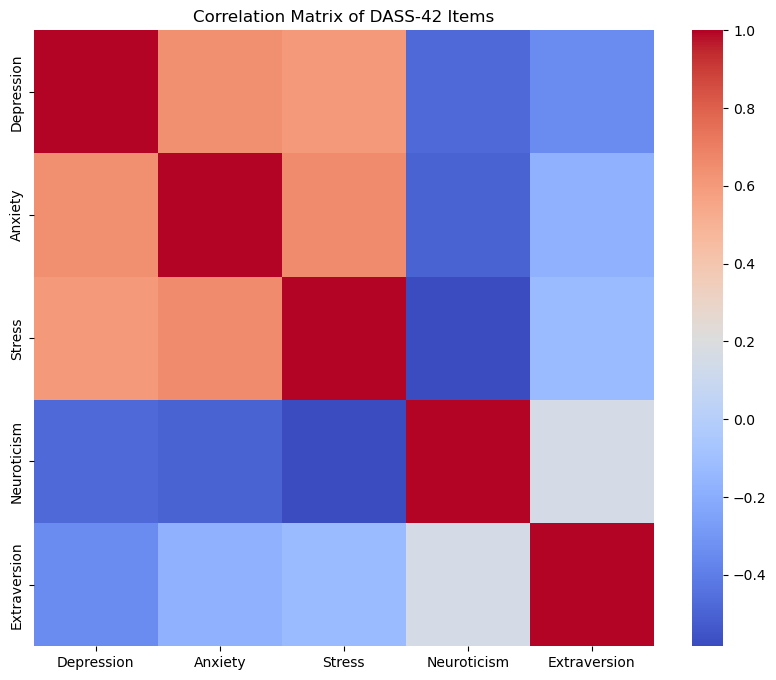

In [95]:
import matplotlib.pyplot as plt
# Assuming `dep_filt`, `anx_filt`, and `str_filt` are DataFrames with filtered items
combined = pd.concat([dep_filt.mean(axis=1), anx_filt.mean(axis=1), str_filt.mean(axis=1),neuroticism.mean(axis=1),extraversion.mean(axis=1)],axis=1)
combined.columns = ["Depression", "Anxiety", "Stress", "Neuroticism", "Extraversion"]

# Compute pairwise correlations
correlation_matrix = combined.corr()

# Display correlation matrix
print(correlation_matrix)

# Optionally, visualize with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of DASS-42 Items")
plt.show()

In [96]:
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,anx_filt.mean(axis=1)))
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,str_filt.mean(axis=1)))
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,neuroticism.mean(axis=1)))
print(scipy.stats.pearsonr(dep_filt.mean(axis=1) ,extraversion.mean(axis=1)))
print(scipy.stats.pearsonr(anx_filt.mean(axis=1) ,str_filt.mean(axis=1)))
print(scipy.stats.pearsonr(anx_filt.mean(axis=1) ,neuroticism.mean(axis=1)))
print(scipy.stats.pearsonr(anx_filt.mean(axis=1) ,extraversion.mean(axis=1)))
print(scipy.stats.pearsonr(str_filt.mean(axis=1) ,neuroticism.mean(axis=1)))
print(scipy.stats.pearsonr(str_filt.mean(axis=1) ,extraversion.mean(axis=1)))
print(scipy.stats.pearsonr(neuroticism.mean(axis=1) ,extraversion.mean(axis=1)))

PearsonRResult(statistic=0.6427879932133054, pvalue=6.9007721144315235e-31)
PearsonRResult(statistic=0.6018922049862189, pvalue=2.5161915084549203e-26)
PearsonRResult(statistic=-0.4724583465458692, pvalue=1.7953381513381787e-15)
PearsonRResult(statistic=-0.3465526867278116, pvalue=1.5016840119549228e-08)
PearsonRResult(statistic=0.6553541455769715, pvalue=1.9682159543181474e-32)
PearsonRResult(statistic=-0.5008763357466398, pvalue=1.7921184049948985e-17)
PearsonRResult(statistic=-0.17708988564978273, pvalue=0.004725080954854073)
PearsonRResult(statistic=-0.5835464037868934, pvalue=1.7442420244135702e-24)
PearsonRResult(statistic=-0.12912340538472855, pvalue=0.04014420345495773)
PearsonRResult(statistic=0.15695410232277401, pvalue=0.0124313634579014)


In [97]:
print(dep_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Depression_items).mean(axis=1)))
print(anx_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Anxiety_items).mean(axis=1)))
print(str_filt.mean(axis=1).corr(items_extracted_DASS.drop(columns=Stress_items).mean(axis=1)))


0.837666595026968
0.8187046446038012
0.7753166943054348


In [98]:
from scipy.stats import pearsonr

# For Depression
dep_corr, dep_p = pearsonr(
    dep_filt.mean(axis=1), 
    items_extracted_DASS.drop(columns=Depression_items).mean(axis=1)
)
print(f"Depression: Correlation = {dep_corr}, p-value = {dep_p}")

# For Anxiety
anx_corr, anx_p = pearsonr(
    anx_filt.mean(axis=1), 
    items_extracted_DASS.drop(columns=Anxiety_items).mean(axis=1)
)
print(f"Anxiety: Correlation = {anx_corr}, p-value = {anx_p}")

# For Stress
str_corr, str_p = pearsonr(
    str_filt.mean(axis=1), 
    items_extracted_DASS.drop(columns=Stress_items).mean(axis=1)
)
print(f"Stress: Correlation = {str_corr}, p-value = {str_p}")


Depression: Correlation = 0.8376665950269679, p-value = 7.071920161375232e-68
Anxiety: Correlation = 0.8187046446038015, p-value = 2.06720793521049e-62
Stress: Correlation = 0.775316694305435, p-value = 5.2157082702375825e-52


In [99]:
# Assuming dep_filt, anx_filt, and str_filt are already defined as 2D arrays or DataFrames, and df contains 'education', 'gender', and 'age' columns

# Initialize an empty list to store the results
results = []

# Perform the statistical tests and store the results
results.append(["dep_filt vs education", *scipy.stats.pearsonr(dep_filt.mean(axis=1), df["education"])])
results.append(["dep_filt vs gender", *scipy.stats.pointbiserialr(dep_filt.mean(axis=1), df["gender"])])
results.append(["dep_filt vs age", *scipy.stats.pearsonr(dep_filt.mean(axis=1), df["age"])])

results.append(["anx_filt vs education", *scipy.stats.pearsonr(anx_filt.mean(axis=1), df["education"])])
results.append(["anx_filt vs gender", *scipy.stats.pointbiserialr(anx_filt.mean(axis=1), df["gender"])])
results.append(["anx_filt vs age", *scipy.stats.pearsonr(anx_filt.mean(axis=1), df["age"])])

results.append(["str_filt vs education", *scipy.stats.pearsonr(str_filt.mean(axis=1), df["education"])])
results.append(["str_filt vs gender", *scipy.stats.pointbiserialr(str_filt.mean(axis=1), df["gender"])])
results.append(["str_filt vs age", *scipy.stats.pearsonr(str_filt.mean(axis=1), df["age"])])

results.append(["tot vs education", *scipy.stats.pearsonr(items_extracted_DASS .mean(axis=1), df["education"])])
results.append(["tot vs gender", *scipy.stats.pointbiserialr(items_extracted_DASS .mean(axis=1), df["gender"])])
results.append(["tot vs age", *scipy.stats.pearsonr(items_extracted_DASS.mean(axis=1), df["age"])])


# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Test", "Correlation Coefficient", "p-value"])

# Print the DataFrame
print(results_df)

                     Test  Correlation Coefficient   p-value
0   dep_filt vs education                -0.093764  0.136937
1      dep_filt vs gender                 0.095878  0.128265
2         dep_filt vs age                -0.090949  0.149173
3   anx_filt vs education                -0.105021  0.095553
4      anx_filt vs gender                 0.068968  0.274449
5         anx_filt vs age                -0.135427  0.031290
6   str_filt vs education                -0.047206  0.454732
7      str_filt vs gender                 0.076115  0.227648
8         str_filt vs age                -0.146576  0.019674
9        tot vs education                -0.112600  0.073802
10          tot vs gender                 0.094545  0.133682
11             tot vs age                -0.139926  0.026041


In [100]:
items_extracted_DASS

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,score
56,2,1,1,1,2,2,1,1,1,1,...,1,1,1,1,1,2,2,1,2,56
144,1,2,1,2,2,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,47
152,2,1,2,2,3,1,2,1,2,1,...,2,3,2,2,1,2,2,1,3,69
324,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,47
369,4,2,2,2,4,4,2,3,3,2,...,2,3,2,3,1,4,1,2,4,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38967,2,1,1,1,2,2,1,2,2,2,...,1,2,1,2,1,2,1,1,2,66
39291,3,1,2,3,2,2,1,2,3,1,...,2,2,1,1,1,2,1,1,2,73
39571,3,2,2,2,2,3,1,2,3,2,...,2,2,2,2,3,2,3,1,3,91
39725,2,3,3,1,3,2,1,4,1,3,...,3,3,2,3,2,3,3,1,4,96


In [101]:
# Define the CFA model
# Define the CFA model with updated item naming
# Define the CFA model
# Define the CFA model
model_spec = """
# Latent variables
Depression =~ Q3A+Q5A+Q10A+Q13A+Q16A+Q17A+Q21A+Q24A+Q26A+Q31A+Q34A+Q37A+Q38A+Q42A
Anxiety =~ Q9A+Q20A+Q28A+Q30A+Q33A+Q36A+Q40A+Q41A
Stress =~ Q1A+Q6A+Q11A+Q14A+Q18A+Q27A+Q32A+Q35A+Q39A
"""

# Fit the CFA model
model = Model(model_spec)
model.fit(items_extracted_DASS)
# Get model summary
# Get the results
stats = semopy.calc_stats(model)
#print(stats.T)
factors = model.predict_factors(items_extracted_DASS)

stats = semopy.calc_stats(model)
print(stats.T)



                     Value
DoF             431.000000
DoF Baseline    465.000000
chi2           1113.518460
chi2 p-value      0.000000
chi2 Baseline  6780.605907
CFI               0.891931
GFI               0.835779
AGFI              0.822824
NFI               0.835779
TLI               0.883406
RMSEA             0.079272
AIC             121.197483
BIC             350.867799
LogLik            4.401259


In [102]:
df = pd.read_csv(r'G:\Il mio Drive\Magistrale_data_science\CSS\CSS\my_project\data.csv',sep= '\t')

In [103]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [104]:
items_extracted_DASS = df[items_Q]

In [105]:
items_extracted_DASS

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39771,3,4,3,4,3,4,4,4,3,4,...,3,4,3,3,3,4,3,3,3,4
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


In [106]:
df["score"] = df[items_Q].sum(axis=1)

In [107]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,score
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,12,1,10,2,1,2,NaN,143
1,4,2,8118,1,36,2890,2,35,4777,3,...,1,2,7,0,70,2,1,4,NaN,110
2,3,7,5784,1,33,4373,4,41,3242,1,...,1,1,4,3,60,1,1,3,NaN,110
3,2,23,5081,3,11,6837,2,37,5521,1,...,1,2,4,5,70,2,1,5,biology,91
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,3,10,1,10,2,1,4,Psychology,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,1,1,2,4,60,2,1,2,NaN,105
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,10,0,10,2,1,4,Mathematic,148
39772,2,1,25147,1,4,4555,2,14,3388,1,...,1,1,7,1,30,1,2,3,Computer Science,52
39773,3,36,4286,1,34,2736,2,10,5968,2,...,1,1,6,1,60,1,1,2,History,104


In [108]:
Depression_items = ["Q3A","Q5A" ,"Q10A","Q13A","Q16A","Q17A","Q21A","Q24A","Q26A","Q31A","Q34A" ,"Q37A","Q38A","Q42A"]
Anxiety_items = ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A"]
Stress_items = ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"]


In [109]:
df["Dep Score"] = df[Depression_items].sum(axis=1)
df["Anx Score"] = df[Anxiety_items].sum(axis=1)
df["Str Score"] = df[Stress_items].sum(axis=1)

In [110]:
df["avg_resp_time"] = df[items_E].mean(axis=1)
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,race,voted,married,familysize,major,score,Dep Score,Anx Score,Str Score,avg_resp_time
0,4,28,3890,4,25,2122,2,16,1944,4,...,10,2,1,2,NaN,143,41,48,54,3752.904762
1,4,2,8118,1,36,2890,2,35,4777,3,...,70,2,1,4,NaN,110,38,31,41,4022.071429
2,3,7,5784,1,33,4373,4,41,3242,1,...,60,1,1,3,NaN,110,53,26,31,6433.190476
3,2,23,5081,3,11,6837,2,37,5521,1,...,70,2,1,5,biology,91,30,31,30,6036.452381
4,2,36,3215,2,13,7731,3,5,4156,4,...,10,2,1,4,Psychology,143,46,54,43,3890.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,60,2,1,2,NaN,105,50,26,29,3395.523810
39771,3,14,4792,4,41,2604,3,15,2668,4,...,10,2,1,4,Mathematic,148,52,48,48,4257.428571
39772,2,1,25147,1,4,4555,2,14,3388,1,...,30,1,2,3,Computer Science,52,18,15,19,5847.047619
39773,3,36,4286,1,34,2736,2,10,5968,2,...,60,1,1,2,History,104,30,27,47,4108.357143


In [112]:

def assign_dass_cutoff(df):
    """
    Assigns a severity level ('cutoff') to each row in a DataFrame based on DASS-42 subscale scores.

    Parameters:
    items_extracted_DASS (pd.DataFrame): A DataFrame with the columns 'Dep Score', 'Anx Score', and 'Str Score'.

    Returns:
    pd.DataFrame: Updated DataFrame with a new column 'cutoff' indicating severity levels.
    """
    def get_cutoff(row):
        if row['Dep Score'] <= 9 and row['Anx Score'] <= 7 and row['Str Score'] <= 14:
            return "Normal"
        elif row['Dep Score'] <= 13 or row['Anx Score'] <= 9 or row['Str Score'] <= 18:
            return "Mild"
        elif row['Dep Score'] <= 20 or row['Anx Score'] <= 14 or row['Str Score'] <= 25:
            return "Moderate"
        elif row['Dep Score'] <= 27 or row['Anx Score'] <= 19 or row['Str Score'] <= 33:
            return "Severe"
        else:
            return "Extremely Severe"

    # Apply the cutoff function row by row
    df['cutoff'] = df.apply(get_cutoff, axis=1)

    return df
                                                                                                                                                         
                                                                                                                                                         

In [113]:

updated_df = assign_dass_cutoff(df)

In [114]:
updated_df[updated_df["cutoff"] == "Moderate"]

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,voted,married,familysize,major,score,Dep Score,Anx Score,Str Score,avg_resp_time,cutoff
7,1,34,4796,1,9,2618,1,39,5823,1,...,1,1,2,Music,56,18,18,20,5516.761905,Moderate
31,2,25,3671,2,26,5743,2,13,3154,1,...,2,1,3,NaN,87,44,22,21,4017.523810,Moderate
32,2,28,2555,2,13,3126,1,40,1875,1,...,1,1,4,teaching,65,17,17,31,3155.309524,Moderate
39,2,5,3382,1,9,2803,1,20,2968,1,...,1,1,3,NaN,56,18,15,23,3194.023810,Moderate
46,1,36,2690,2,1,19731,1,17,3205,1,...,2,1,2,psychology,66,19,24,23,22991.071429,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39761,2,35,3451,1,23,3002,1,33,2576,1,...,1,2,3,medicine,57,19,15,23,4636.500000,Moderate
39762,1,27,2977,2,34,4702,1,20,3981,1,...,2,1,4,Social science,72,25,24,23,4299.047619,Moderate
39764,2,17,5521,2,40,5088,1,19,2535,1,...,2,1,2,computer sciece,64,26,16,22,5439.571429,Moderate
39768,2,12,5614,1,10,1649,1,20,2988,1,...,1,1,3,Psychology,64,20,16,28,3405.142857,Moderate


In [115]:
def reverse_item(x):
    return 8-x

In [116]:
reverse_columns = ["TIPI6","TIPI2","TIPI8","TIPI4","TIPI10"]
updated_df[reverse_columns] = updated_df[reverse_columns].applymap(reverse_item)

C:\Users\tosim\AppData\Local\Temp\ipykernel_9792\3362941019.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  updated_df[reverse_columns] = updated_df[reverse_columns].applymap(reverse_item)


In [117]:
features = ["age","married", "engnat","familysize","orientation","education","avg_resp_time"]

In [118]:
new_features = items_TIPI + features

In [119]:
new_features 

['TIPI1',
 'TIPI2',
 'TIPI3',
 'TIPI4',
 'TIPI5',
 'TIPI6',
 'TIPI7',
 'TIPI8',
 'TIPI9',
 'TIPI10',
 'age',
 'married',
 'engnat',
 'familysize',
 'orientation',
 'education',
 'avg_resp_time']

In [120]:
X = updated_df[new_features]  # Features: TIPI and demographic data
y = updated_df['cutoff']  # Target: Depression score

In [121]:
X

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,age,married,engnat,familysize,orientation,education,avg_resp_time
0,1,3,7,1,7,1,7,3,1,7,16,1,2,2,1,2,3752.904762
1,6,3,4,1,5,4,7,1,1,3,16,1,1,4,0,2,4022.071429
2,2,3,2,6,5,2,5,3,3,6,17,1,2,3,3,2,6433.190476
3,1,7,7,4,6,4,6,7,6,7,13,1,1,5,5,1,6036.452381
4,2,3,3,2,5,3,5,2,3,5,19,1,2,4,1,3,3890.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,6,3,3,6,3,5,5,3,2,16,1,1,2,4,2,3395.523810
39771,4,3,5,1,4,2,4,1,4,4,21,1,2,4,0,3,4257.428571
39772,6,2,7,3,6,5,6,7,5,4,48,2,1,3,1,3,5847.047619
39773,1,2,5,1,3,3,3,3,3,4,20,1,1,2,1,3,4108.357143


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [125]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5846637335009428
Classification Report:
                   precision    recall  f1-score   support

Extremely Severe       0.68      0.84      0.75      3964
            Mild       0.57      0.27      0.37       450
        Moderate       0.44      0.45      0.45      1515
          Severe       0.39      0.26      0.31      2026

        accuracy                           0.58      7955
       macro avg       0.52      0.45      0.47      7955
    weighted avg       0.56      0.58      0.56      7955

Confusion Matrix:
 [[3314   12  242  396]
 [  42  121  235   52]
 [ 401   63  689  362]
 [1093   16  390  527]]


In [126]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
          Feature  Importance
3           TIPI4    0.132033
16  avg_resp_time    0.119586
10            age    0.085214
8           TIPI9    0.084023
13     familysize    0.061094
9          TIPI10    0.055941
7           TIPI8    0.054783
1           TIPI2    0.053095
5           TIPI6    0.052257
0           TIPI1    0.051581
2           TIPI3    0.048925
6           TIPI7    0.048765
4           TIPI5    0.047378
14    orientation    0.037117
15      education    0.036018
12         engnat    0.018279
11        married    0.013911
